In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:

test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

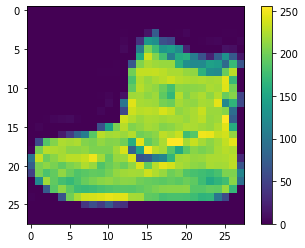

In [9]:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

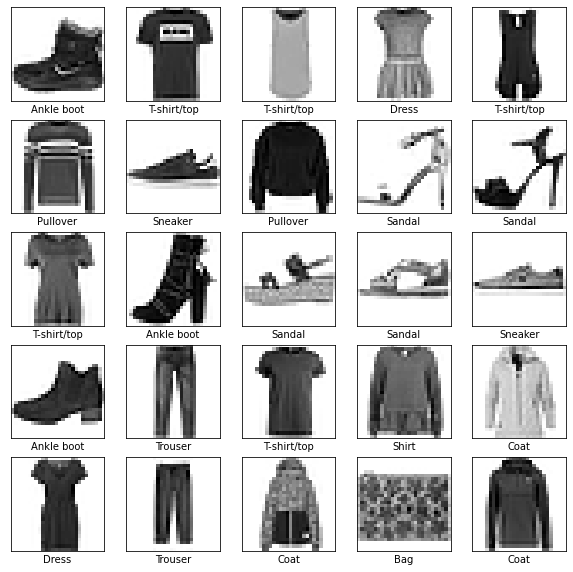

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282 - accuracy: 0.7778
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3428 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3056 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8987
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9036
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2538 - accuracy: 0.9069
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2403 - accuracy: 0.9102
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.233

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3325 - accuracy: 0.8804

Test accuracy: 0.8804000020027161


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.04557486e-07, 6.19949788e-07, 6.84636689e-07, 7.68433051e-09,
       1.49250255e-07, 8.50206125e-04, 3.78813274e-06, 4.12894040e-02,
       1.28699558e-05, 9.57842112e-01], dtype=float32)

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

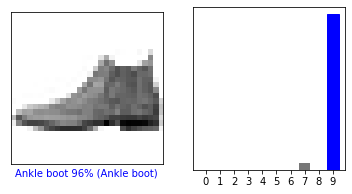

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

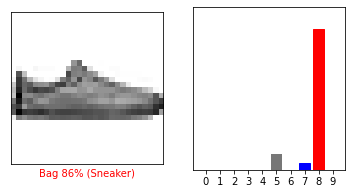

In [20]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

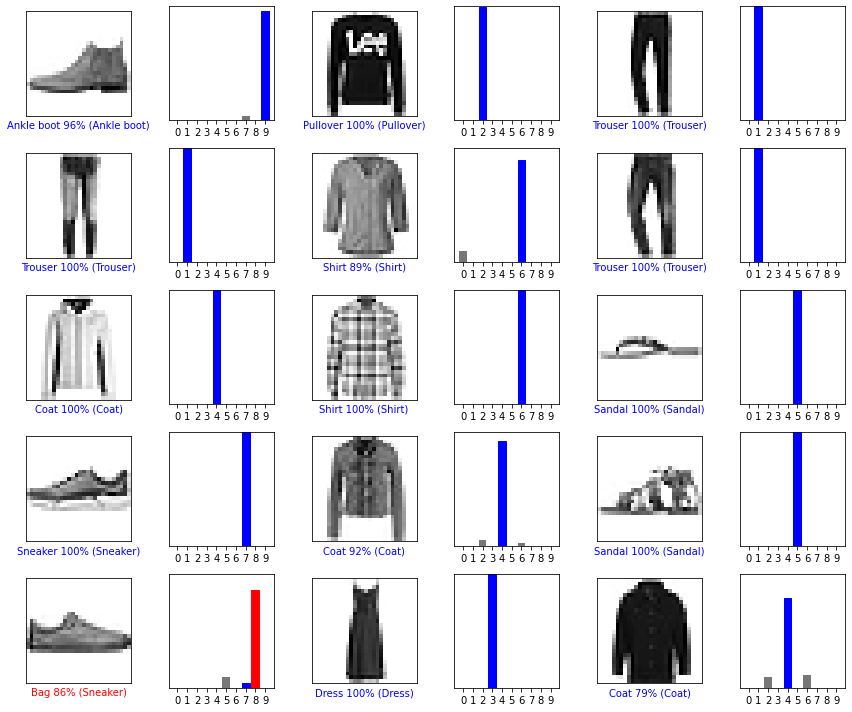

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [23]:
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.8140526e-05 1.0671061e-15 9.9888033e-01 3.1924496e-12 9.6182426e-04
  2.3280372e-11 1.1970307e-04 1.5946848e-15 1.2762918e-11 2.3025774e-12]]


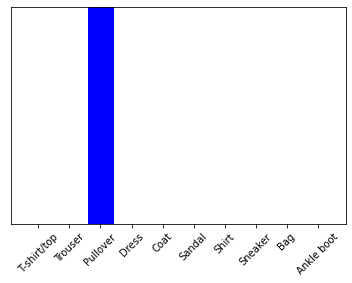

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)